In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

# Set style and settings
plt.style.use('ggplot')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 15)

In [3]:
# Load data and set Datetime column
collisions = pd.read_csv('../data/external/Collisions.csv', 
                         parse_dates={'Datetime': ['INCDTTM']}, 
                         infer_datetime_format=True)

In [4]:
# Clean up and set index to datetime
collisions = (
    collisions.set_index('Datetime')
    .sort_index()
    .drop(columns=['EXCEPTRSNDESC', 'EXCEPTRSNCODE', 'REPORTNO', 'STATUS'])
)

In [5]:
collisions.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 220436 entries, 2003-10-06 00:00:00 to 2020-07-14 00:00:00
Data columns (total 35 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                212975 non-null  float64
 1   Y                212975 non-null  float64
 2   OBJECTID         220436 non-null  int64  
 3   INCKEY           220436 non-null  int64  
 4   COLDETKEY        220436 non-null  int64  
 5   ADDRTYPE         216729 non-null  object 
 6   INTKEY           71516 non-null   float64
 7   LOCATION         215860 non-null  object 
 8   SEVERITYCODE     220435 non-null  object 
 9   SEVERITYDESC     220436 non-null  object 
 10  COLLISIONTYPE    194284 non-null  object 
 11  PERSONCOUNT      220436 non-null  int64  
 12  PEDCOUNT         220436 non-null  int64  
 13  PEDCYLCOUNT      220436 non-null  int64  
 14  VEHCOUNT         220436 non-null  int64  
 15  INJURIES         220436 non-null  int64  
 16  SERI

In [6]:
collisions.describe()

,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,212975.000000,212975.000000,220436.000000,220436.000000,220436.000000,71516.000000,220436.000000,220436.000000,220436.000000,220436.000000,220436.000000,220436.000000,220436.000000,220435.000000,1.272050e+05,220436.000000,2.204360e+05
mean,-122.330748,47.620232,110218.500000,143893.625937,144116.360395,37614.720790,2.227145,0.038156,0.027310,1.730697,0.373868,0.015165,0.001674,13.382362,7.971063e+06,262.425969,9.617439e+03
std,0.030042,0.056009,63634.536307,88451.013280,88818.314232,51915.702891,1.471406,0.201881,0.164398,0.829041,0.732352,0.158077,0.044493,7.305444,2.611523e+06,3254.921395,7.160964e+04
min,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,-122.349280,47.577331,55109.750000,71395.750000,71395.750000,28652.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,6.007029e+06,0.000000,0.000000e+00
50%,-122.330348,47.616106,110218.500000,126707.500000,126707.500000,29973.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,8.033011e+06,0.000000,0.000000e+00
75%,-122.311998,47.664261,165327.250000,208526.250000,208726.250000,33983.000000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,14.000000,1.018101e+07,0.000000,0.000000e+00
max,-122.238949,47.734142,220436.000000,332640.000000,334140.000000,757580.000000,93.000000,6.000000,2.000000,15.000000,78.000000,41.000000,5.000000,87.000000,1.307202e+07,525241.000000,5.239700e+06


In [7]:
# Pandas profiling, use minimal=True for large dataset
#profile = ProfileReport(collisions, title='Collisions Profile Report', minimal=True)
#profile.to_file('../reports/collisions_profiling.html')


### Notes after initial exploration
1. Use 'INTKEY' to identify intersections.
2. 'SEVERITYCODE' can be used to cross-reference the intersection with severity. How do we reconcile this with 'SERIOUSINJURIES' and 'FATALITIES'?
3. 'SPEEDING' is missing a lot, but this could be a helpful feature.
4. 'JUNCTIONTYPE' or 'ADDRTYPE',  will need OHE for logistic regression. 
5. Target variable? Create 'Dangerous' based on what criteria?



ML Algorithms: can use GBC or RF if we don't want to worry about multicollinearity or preprocessing (OHE/nomalization). 

In [8]:
collisions.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,ADDRTYPE,INTKEY,LOCATION,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-10-06,-122.320755,47.608073,1680,3663,3663,Intersection,29797.0,BROADWAY AND CHERRY ST,0,Unknown,NaN,0,0,0,0,0,0,0,2003/10/06 00:00:00+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,3279003.0,NaN,NaN,NaN,0,0,N
2004-01-01,NaN,NaN,11627,25040,25040,Block,NaN,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,2,Injury Collision,Rear Ended,2,0,0,2,1,0,0,2004/01/01 00:00:00+00,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Raining,Dry,Dark - Street Lights On,NaN,4001002.0,NaN,13,From same direction - both going straight - bo...,0,0,N
2004-01-01,-122.318760,47.604359,12525,24635,24635,Block,NaN,E ALDER ST BETWEEN 10TH AVE AND 11TH AVE,1,Property Damage Only Collision,Parked Car,2,0,0,2,0,0,0,2004/01/01 00:00:00+00,Mid-Block (not related to intersection),16.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Snowing,Snow/Slush,Unknown,NaN,4001026.0,NaN,32,One parked--one moving,0,0,N
2004-01-01,-122.320780,47.614076,14172,26463,26463,Intersection,29745.0,BROADWAY AND E PIKE ST,2,Injury Collision,Left Turn,4,0,0,2,1,0,0,2004/01/01 00:00:00+00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Overcast,Wet,Dark - Street Lights On,NaN,4001015.0,NaN,28,From opposite direction - one left turn - one ...,0,0,N
2004-01-01,NaN,NaN,16515,29248,29248,NaN,NaN,NaN,0,Unknown,NaN,0,0,0,0,0,0,0,2004/01/01 00:00:00+00,NaN,0.0,NOT ENOUGH INFORMATION / NOT APPLICABLE,NaN,NaN,NaN,NaN,NaN,NaN,4001030.0,NaN,NaN,NaN,0,0,N


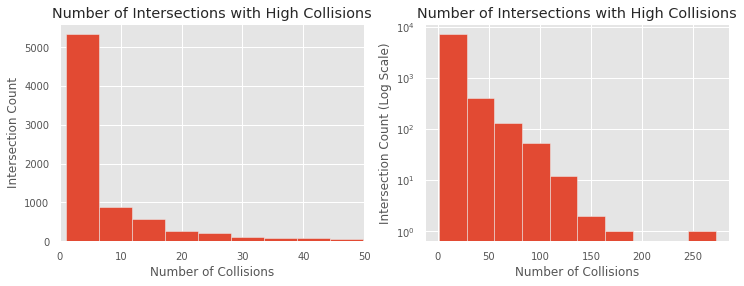

In [53]:
## Look at collision count at specific intersections
n_coll_intersect = collisions.groupby(by='INTKEY').count().sort_values(by='OBJECTID', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(12,4))
ax = axes[0]
ax.hist(n_coll_intersect['OBJECTID'], bins=50)
ax.set_xlim(0,50)
ax.set_xlabel('Number of Collisions')
ax.set_ylabel('Intersection Count')
ax.set_title("Number of Intersections with High Collisions")

ax = axes[1]
ax.hist(n_coll_intersect['OBJECTID'], bins=10, log=True)
ax.set_xlabel('Number of Collisions')
ax.set_ylabel('Intersection Count (Log Scale)')
ax.set_title("Number of Intersections with High Collisions")

plt.savefig('../reports/figures/intersection_count.png')

In [66]:
# Break down by pedestrian or cyclist involvement
pedcycle_count = collisions.groupby(by='PEDCYLCOUNT').count()['OBJECTID']
ped_count = collisions.groupby(by='PEDCOUNT').count()['OBJECTID']
pedcycle_count, ped_count

# Get fraction of collisions that included 1 or more cyclists
pedcycle_count.loc[1:].sum()/pedcycle_count.sum()

# Get fraction of collisions that included pedestrians
ped_count.loc[1:].sum()/ped_count.sum()

0.03647770781542035

In [67]:
ped_count

PEDCOUNT
0    212395
1      7727
2       274
3        28
4         9
5         2
6         1
Name: OBJECTID, dtype: int64